# Examining the 2018 California Wildfires from Space
Summary, via Wikiepdia: A total of 6,870 fires had burned an area of 6,141.12 km${^2}$, according to the California Department of Forestry and Fire Protection and the National Interagency Fire Center, as of October 9. The fires caused over \$ 3 billion in damages.

The smoke from the wildfires also had an impact on air quality both in proximity of the fires as well as across the country. Using Jupyter notebooks, Python, and satellite imagery, we'll examine the impact these events had on Aerosol Optical Depth (AOD) across the United States.

## Exercise 1-1: Examining AERONET ground stations
Aerosol Optical Depth (AOD) is a proxy for the particulate concentration in the atmosphere and the angstrom exponent (AE) gives a sense of the particle size. Thus, where AOD > 0.2 and AE > 1.0, the event can be roughly classified as smoke.

AERONET Stations make surface observations of these two quantities at several different absorbing wavelengths. Below is a time series plot at the Pacific Northwest National Lab for  AUGUST, 2018. Air quality was poor in the Pacific Northwest through the week of Aug 20, 2018:

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

%pylab inline
plt.rcParams['figure.figsize'] = [10, 5]

Populating the interactive namespace from numpy and matplotlib


In [13]:
# Import the data
aeronet=pd.read_csv("data/20180801_20180831_PNNL_lev15.csv")
list(aeronet)
#from datetime import datetime

# Convert the date columns to datetime format:
aeronet['datetime'] = pd.to_datetime(aeronet['Date(dd:mm:yyyy)']+' '+ aeronet['Time(hh:mm:ss)'], format='%d:m:Y %H%M%S')
#AOD = pd.Series(aeronet["AOD_500nm"], index=aeronet["ts"])
#aeronet['Date(dd:mm:yyyy)']+':'+aeronet['Time(hh:mm:ss)']
#datetime_object = strptime(ts, '%d:m:Y:%h%M%S')

# Plot the time series
#aeronet["AOD_500nm"]
#AOD.plot()
#plt.show()

ValueError: time data '01:08:2018 13:38:54' does not match format '%d:m:Y %H%M%S' (match)

Time series data show more typical summertime AOD and AE levels, which increase between DATE1 and DATE2:

## Exercise 1-3:  Open netCDF files from NOAA-20 polar orbiting satellite and inspect the contents

## Exercise 2-1:  View of the smoke plume from the NOAA-20 polar orbiting satellite
Satellite imagery enables scientists and forecasters to track the progression of smoke plumes. The VIIRS instrument on NOAA-20 produces imagery approximately once a day over this region, at XX resolution.

In [41]:
from netCDF4 import Dataset
import cartopy.crs as ccrs

## Open NOAA-20 data and make a plot using Cartopy

In [ ]:
# Open the files
f = Dataset('data/JRR-AOD_v1r1_npp_s201808091955538_e201808091957180_c201808092049460.nc')
AOD550_1 = f.variables['AOD550']
lat_1 = f.variables['Latitude']
lon_1 = f.variables['Longitude']

# Make the plot
ax = plt.axes(projection=ccrs.PlateCarree())
levs = np.arange(0,1,0.1)
plt.contourf(lon, lat, AOD550, levs, transform=ccrs.PlateCarree())
ax.coastlines()
plt.show()

## Open two NOAA-20 granules

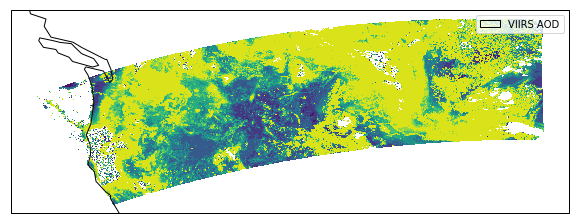

In [48]:
# Open the files
f = Dataset('data/JRR-AOD_v1r1_npp_s201808091955538_e201808091957180_c201808092049460.nc')
AOD550_1 = f.variables['AOD550'][:]
lat_1 = f.variables['Latitude'][:]
lon_1 = f.variables['Longitude'][:]

f = Dataset('data/JRR-AOD_v1r1_npp_s201808091957192_e201808091958434_c201808092051240.nc')
AOD550_2 = f.variables['AOD550'][:]
lat_2 = f.variables['Latitude'][:]
lon_2 = f.variables['Longitude'][:]

# Put the files together
AOD550 = np.append(AOD550_1, AOD550_2, axis=0)
lat = np.append(lat_1, lat_2, axis=0)
lon = np.append(lon_1, lon_2, axis=0)

# Sanity check: see if the new shape is > the old one
#print(AOD550_1.shape, AOD550_2.shape, AOD550.shape)

# Make the plot
ax = plt.axes(projection=ccrs.PlateCarree())
levs = np.arange(0,1,0.1)
plt.contourf(lon, lat, AOD550, levs, transform=ccrs.PlateCarree())
ax.coastlines()
plt.show()

## Challenge: Write a function to iterate over all available files

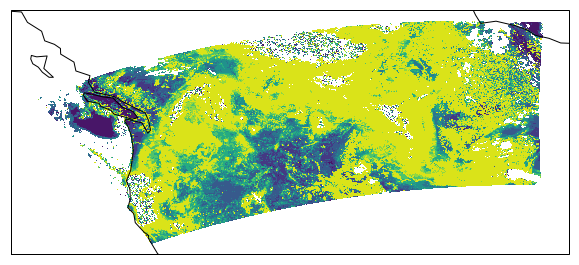

In [47]:
# Write a function if you will iteratively open files..
def getVIIRS(fname):
    f = Dataset(fname)
    var = f.variables['AOD550'][:]
    lat = f.variables['Latitude'][:]
    lon = f.variables['Longitude'][:]
    return lat, lon, var

for filenum, filename in enumerate(glob("data/JRR-AOD_*.nc")):
    lat_tmp, lon_tmp, AOD550_tmp = getVIIRS(filename)
    if filenum == 0:
        AOD550 = AOD550_tmp
        lat = lat_tmp
        lon = lon_tmp
    else:
        AOD550 = np.append(AOD550, AOD550_tmp, axis=0)
        lat = np.append(lat, lat_tmp, axis=0)
        lon = np.append(lon, lon_tmp, axis=0)

ax = plt.axes(projection=ccrs.PlateCarree())
levs = np.arange(0,1,0.1)
cs = plt.contourf(lon, lat, AOD550, levs, transform=ccrs.PlateCarree(), cmap=cm.PuBu_r)
ax.coastlines()
cbar = fig.colorbar(cs)
plt.show()

## Exercise 2-2: High quality AOD retrievals
The ABI on GOES-16 and GOES-17 provide AOD estimates every 15 minutes at 4km resolution.

In [11]:
DQF = f.variables['DQF'][:]
AOD550[dqf >=2] = -999.0

ax = plt.axes(projection=ccrs.PlateCarree())
levs = np.arange(0,1,0.1)
cs = plt.contourf(lon, lat, AOD550, levs, transform=ccrs.PlateCarree(), cmap=cm.PuBu_r)
ax.coastlines()
cbar = fig.colorbar(cs)
plt.show()

KeyError: 'Latitude'

### Exercise 2-3: Save the result
The ABI on GOES-16 and GOES-17 provide AOD estimates every 15 minutes at 4km resolution.